# Tech test

The aim of this test is to evaluate some of the skills that you will use on your day-to-day activies at Sensyne Health.
We collaborate as a team and the output of the Analytics side of the team has to be usable by others who might not necessarily be fluent in ML-ese.
The aim of this task is to complete the assignment by focussing on key elements such as code reusability, clarity, conciseness, and use of best practices.

In order to complete this assignment please consider the following classification problem given the dataset below (you are free to add and remove steps as you feel is required). 

Data contains information about mothers who may or may not develop diabetes (Outcome).

1. Explore the data, identify and clarify any assumption you will make
2. Consider any change/operation you will do based on your assumptions
3. Your colleagues have used a Logistic regression classifier. Review the code and apply all the changes that you feel are required
4. Compare this outcome with other two classifiers. Which one is the best out of the three?
5. You are afraid of overfitting. How do you adjust your program to take care of that?
6. Which classifier would you pick?

At every step, git commit a different version of the Notebook to show the changes. Please do so on a local git repository. Don't worry about branches.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

np.random.seed(int(rnd.random()*10000000))
dataset = pd.read_csv("./dataset.csv")

## Question
Can you please explore the data and provide some valid assumptions on them?

## Question
Anything that we need to do based on your assumptions?

In [2]:
class0 = dataset.Outcome==0
class1 = dataset.Outcome==1

In [3]:
data_class0 = dataset[class0]
data_class1 = dataset[class1]

In [4]:
# Split train and test
# Remaining of the proportion get you (1 - 0.7) automatically

train_split_0 = int(np.floor(0.7 * len(data_class0)))
train_split_1 = int(np.floor(0.7 * len(data_class1)))

train_data = pd.concat([ data_class0[ :train_split_0    ], data_class1[ :train_split_1    ] ])
test_data  = pd.concat([ data_class0[  train_split_0+1: ], data_class1[  train_split_1+1: ] ])

assert abs(0.7 - (len(train_data) / (len(train_data) + len(test_data)))) < 0.01, "There must be a problem with the train/test split of data"

## Logistic regression

/Users/carmelo.velardo/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


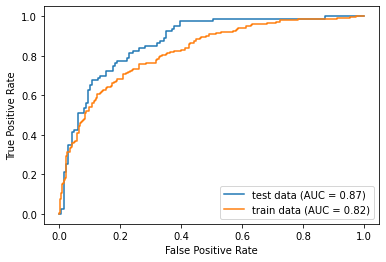

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression().fit(train_data.loc[:, train_data.columns != 'Outcome'], np.ravel(train_data.loc[:, train_data.columns == 'Outcome']))

prediction_test             = classifier.predict(test_data.loc[:, test_data.columns != 'Outcome'])
prediction_probability_test = classifier.predict_proba(test_data.loc[:, test_data.columns != 'Outcome'])

fig, ax = plt.subplots()

metrics.plot_roc_curve(classifier, test_data.loc[:, test_data.columns != 'Outcome'], np.ravel(test_data.loc[:, test_data.columns == 'Outcome']), name= "test data", ax = ax)
metrics.plot_roc_curve(classifier, train_data.loc[:, train_data.columns != 'Outcome'], np.ravel(train_data.loc[:, train_data.columns == 'Outcome']), name= "train data",ax = ax)
